In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv("heart_disease.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,FALSE,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,FALSE,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,FALSE,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,FALSE,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,TRUE,1.5,flat,fixed defect,0


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


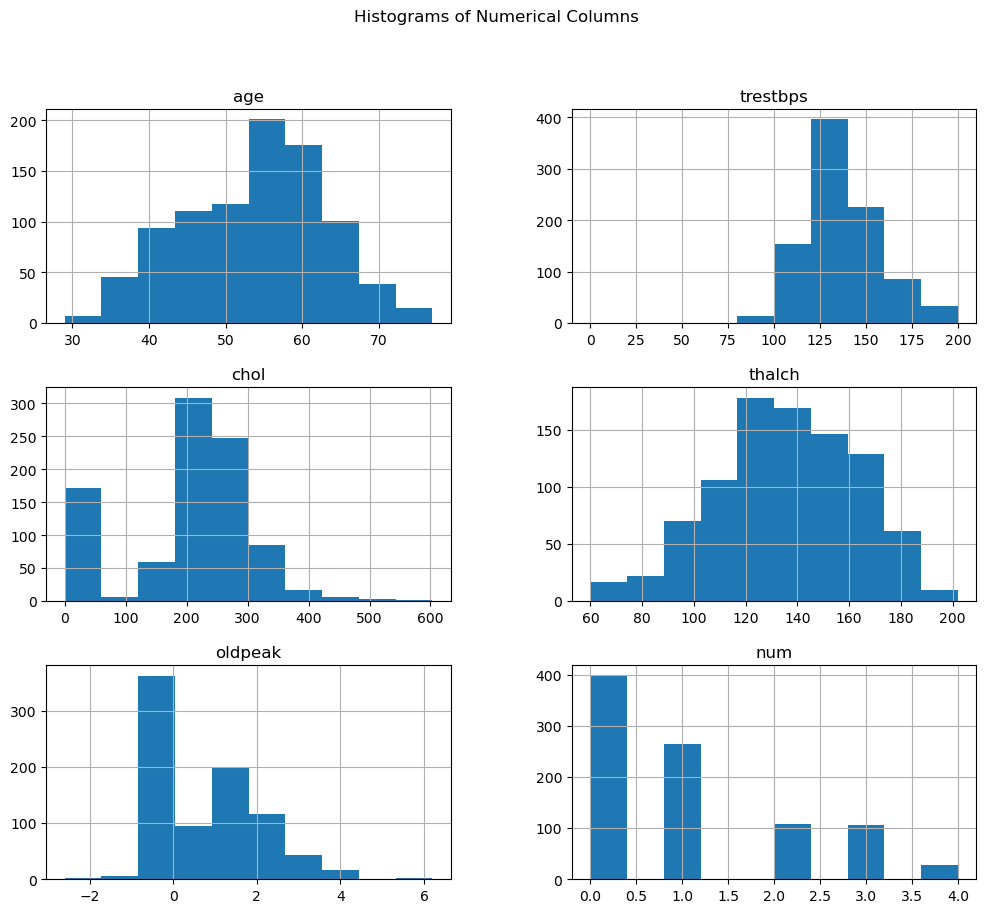

In [22]:
data.hist(figsize=(12,10))
plt.suptitle("Histograms of Numerical Columns")
plt.show()


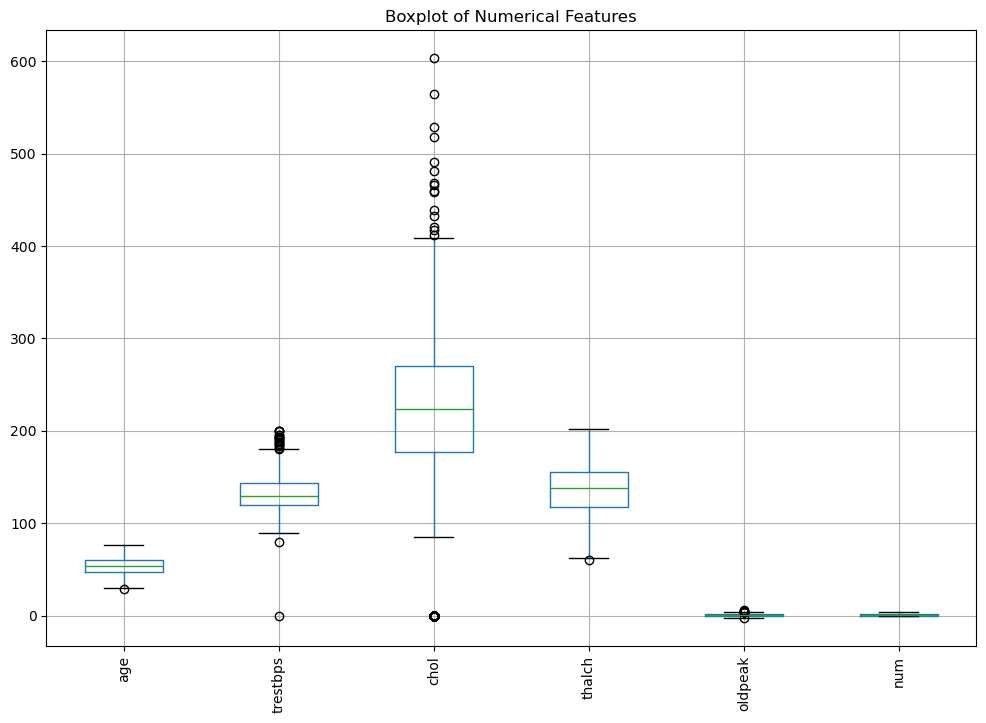

In [23]:
numeric_cols = data.select_dtypes(include=[np.number]).columns.tolist()

plt.figure(figsize=(12,8))
data.boxplot(column=numeric_cols)
plt.title("Boxplot of Numerical Features")
plt.xticks(rotation=90)
plt.show()


In [24]:
from sklearn.preprocessing import LabelEncoder

# Create label encoder object
le = LabelEncoder()

# Apply to all object columns
for col in data.select_dtypes(include=['object']).columns:
    data[col] = le.fit_transform(data[col])

data.dtypes


age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs            bool
restecg       int64
thalch        int64
exang         int64
oldpeak     float64
slope         int64
thal          int64
num           int64
dtype: object

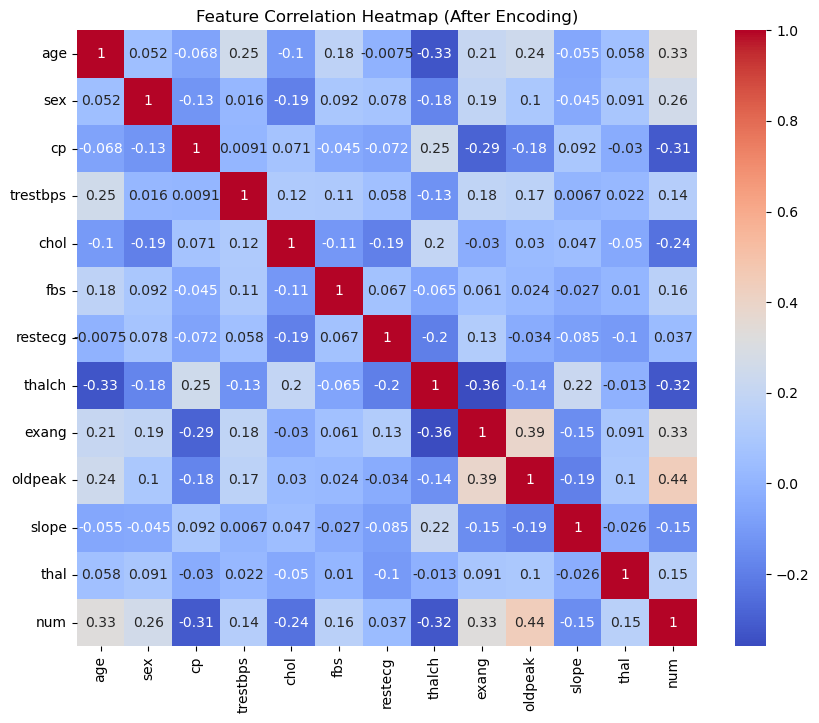

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap (After Encoding)")
plt.show()



In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data[['age','chol','trestbps','thal']] = scaler.fit_transform(data[['age','chol','trestbps','thal']])


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

X = data.drop('num', axis=1)
y = data['num']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.4835164835164835
              precision    recall  f1-score   support

           0       0.73      0.70      0.71        89
           1       0.33      0.35      0.34        48
           2       0.29      0.27      0.28        22
           3       0.16      0.18      0.17        17
           4       0.00      0.00      0.00         6

    accuracy                           0.48       182
   macro avg       0.30      0.30      0.30       182
weighted avg       0.49      0.48      0.49       182



In [28]:
model = DecisionTreeClassifier(max_depth=4, criterion='entropy', random_state=42)
model.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)

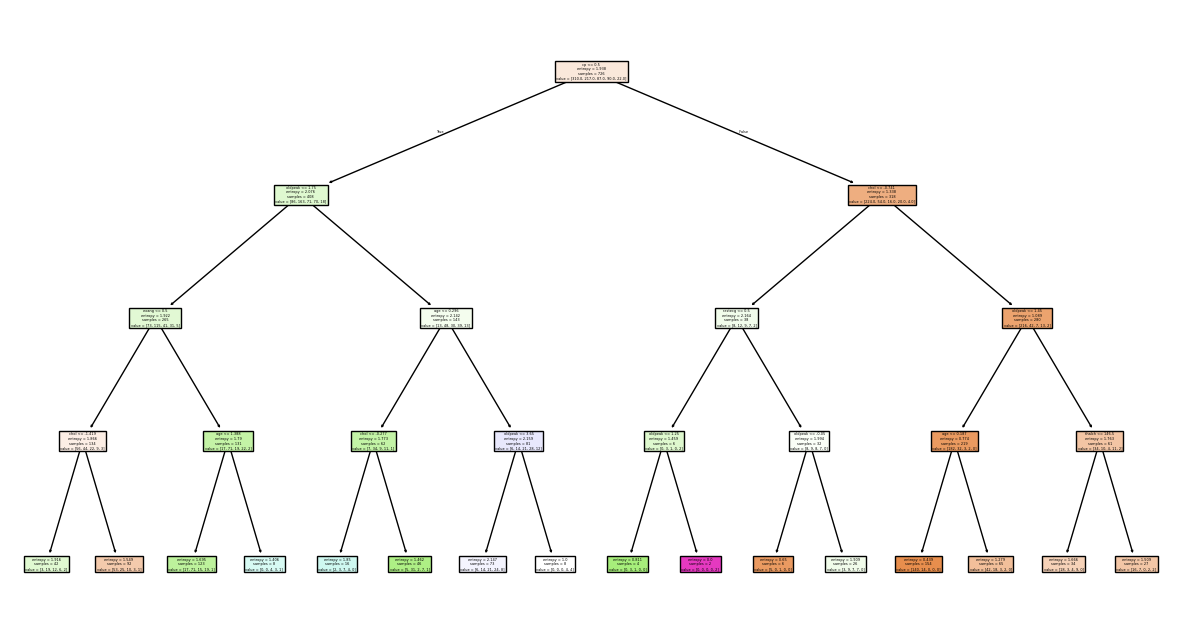

In [29]:
from sklearn import tree
plt.figure(figsize=(15,8))
tree.plot_tree(model, filled=True, feature_names=X.columns)
plt.show()


#### 1. What are some common hyperparameters of Decision Tree models, and how do they affect performance?

Decision Trees have several important hyperparameters that control overfitting, underfitting, and model complexity.

1. max_depth
Controls how deep the tree can grow.
Effect: Prevents overfitting by limiting tree size.

2. min_samples_spl
Effect: Reduces overfitting.

3. min_samples_le
Effect: Smooths the predictions, avoids very tiny leaves (overfitting).

4. criterion
Effect: Criterion changes how the tree chooses the best split.

#### 2. What is the difference between Label Encoding and One-Hot Encoding?
Label Encoding
Converts categories into numbers.
Example:
Red → 0
Blue → 1
Green → 2

Converts categories into multiple new binary columns.

Example:

Color	Red	Blue Green
Red		1	0     0
Blue	0	1	  0
Green	0	0	  1
